In [1]:
import pandas as pd

In [2]:
base_path = '../data'

In [3]:
train_df = pd.read_csv(f'{base_path}/train.csv')

print(train_df.shape)

print(train_df.dtypes)

train_df.head()

(20216100, 4)
building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


# Cast de colunas

In [4]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# Initial plots

In [18]:
train_df['timestamp'].dt.date.sort_values()

0           2016-01-01
36742       2016-01-01
36743       2016-01-01
36744       2016-01-01
36745       2016-01-01
               ...    
20178296    2016-12-31
20178297    2016-12-31
20178298    2016-12-31
20178287    2016-12-31
20216099    2016-12-31
Name: timestamp, Length: 20216100, dtype: object

<AxesSubplot:xlabel='timestamp'>

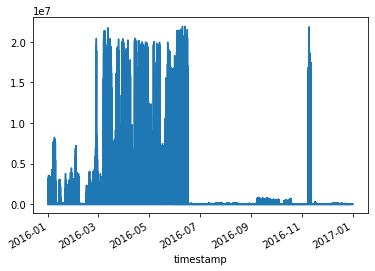

In [5]:
(
    train_df
    .set_index('timestamp')['meter_reading']
    .plot()
)

<AxesSubplot:>

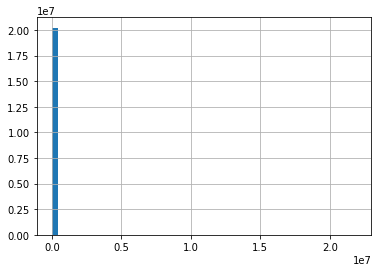

In [37]:
train_df['meter_reading'].hist(bins=50)

In [9]:
# separando por meter
df_meter = (
    train_df
    .groupby(['timestamp', 'meter'])['meter_reading']
    .sum()
    .reset_index()
    .set_index('timestamp')
)

df_meter.head()

,meter,meter_reading
timestamp,,
2016-01-01 00:00:00,0,1.467970e+05
2016-01-01 00:00:00,1,5.239657e+04
2016-01-01 00:00:00,2,3.924435e+06
2016-01-01 00:00:00,3,8.765517e+04
2016-01-01 01:00:00,0,1.664396e+05


# Electricity

In [27]:
df_electricity = df_meter.query('meter == 0')
df_electricity.head()

,meter,meter_reading
timestamp,,
2016-01-01 00:00:00,0,146796.9708
2016-01-01 01:00:00,0,166439.5826
2016-01-01 02:00:00,0,166652.5184
2016-01-01 03:00:00,0,166988.5308
2016-01-01 04:00:00,0,167381.4970


<AxesSubplot:>

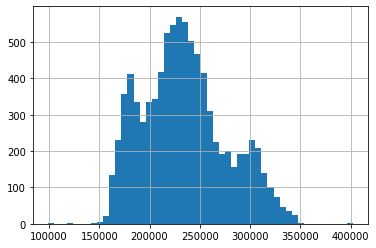

In [38]:
df_electricity['meter_reading'].hist(bins=50)

In [44]:
df_electricity['meter_reading'].describe()

count      8784.000000
mean     234552.894683
std       41777.364106
min       99336.000700
25%      203950.088125
50%      231349.616550
75%      259272.487950
max      401885.223100
Name: meter_reading, dtype: float64

<AxesSubplot:xlabel='timestamp'>

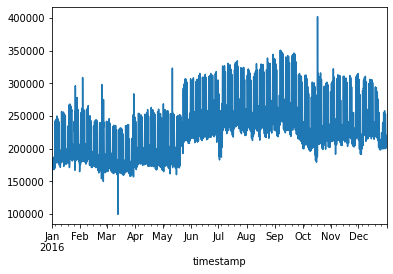

In [28]:
# Daily
df_electricity['meter_reading'].plot()

<AxesSubplot:xlabel='timestamp'>

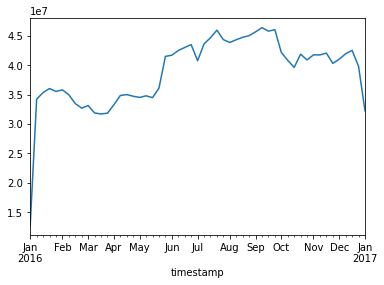

In [30]:
# Weekly
df_electricity['meter_reading'].resample('W').sum().plot()

<AxesSubplot:xlabel='timestamp'>

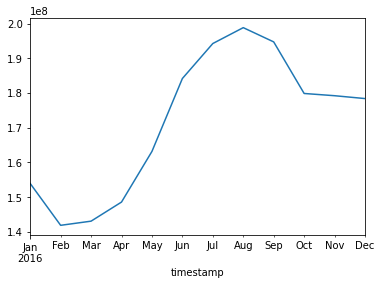

In [31]:
# Monthly
df_electricity['meter_reading'].resample('M').sum().plot()

In [35]:
df_electriciy_building = (
    train_df
    .query('meter == 0')
    .groupby(['timestamp', 'building_id'])['meter_reading']
    .sum()
    .reset_index()
    .set_index('timestamp')
)

df_electriciy_building.head()

,building_id,meter_reading
timestamp,,
2016-01-01,0,0.0
2016-01-01,1,0.0
2016-01-01,2,0.0
2016-01-01,3,0.0
2016-01-01,4,0.0


In [36]:
df_electriciy_building['building_id'].unique().shape

(1413,)

# Chilledwater

In [39]:
df_chilledwater = df_meter.query('meter == 1')
df_chilledwater.head()

,meter,meter_reading
timestamp,,
2016-01-01 00:00:00,1,52396.5669
2016-01-01 01:00:00,1,59582.4064
2016-01-01 02:00:00,1,58646.9936
2016-01-01 03:00:00,1,55827.6281
2016-01-01 04:00:00,1,53843.3643


<AxesSubplot:>

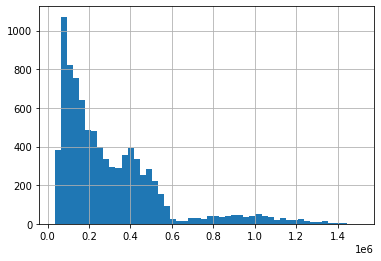

In [40]:
df_chilledwater['meter_reading'].hist(bins=50)

In [45]:
df_chilledwater['meter_reading'].describe()

count    8.784000e+03
mean     3.015718e+05
std      2.509347e+05
min      3.367536e+04
25%      1.190281e+05
50%      2.239924e+05
75%      4.068221e+05
max      1.502244e+06
Name: meter_reading, dtype: float64

<AxesSubplot:xlabel='timestamp'>

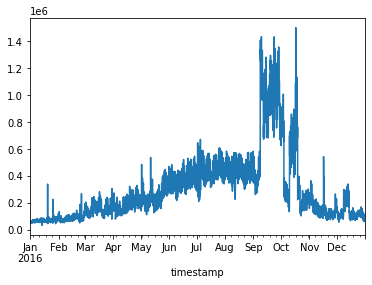

In [46]:
# Daily
df_chilledwater['meter_reading'].plot()

<AxesSubplot:xlabel='timestamp'>

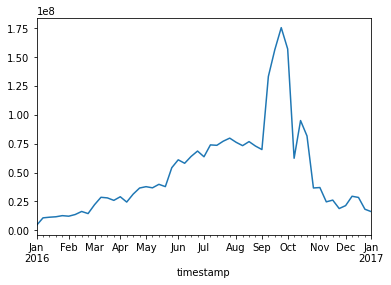

In [41]:
# Weekly
df_chilledwater['meter_reading'].resample('W').sum().plot()

<AxesSubplot:xlabel='timestamp'>

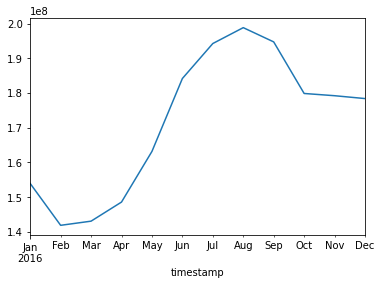

In [31]:
# Monthly
df_chilledwater['meter_reading'].resample('M').sum().plot()

In [42]:
df_chilledwater_building = (
    train_df
    .query('meter == 1')
    .groupby(['timestamp', 'building_id'])['meter_reading']
    .sum()
    .reset_index()
    .set_index('timestamp')
)

df_chilledwater_building.head()

,building_id,meter_reading
timestamp,,
2016-01-01,161,0.0000
2016-01-01,162,0.0000
2016-01-01,163,4.5719
2016-01-01,166,209.8860
2016-01-01,167,0.0000


In [43]:
df_chilledwater_building['building_id'].unique().shape

(498,)

# Steam

In [48]:
df_steam = df_meter.query('meter == 2')
df_steam.head()

,meter,meter_reading
timestamp,,
2016-01-01 00:00:00,2,3.924435e+06
2016-01-01 01:00:00,2,3.964789e+06
2016-01-01 02:00:00,2,9.660917e+05
2016-01-01 03:00:00,2,7.249452e+05
2016-01-01 04:00:00,2,8.847084e+05


<AxesSubplot:>

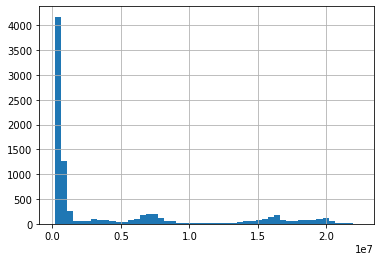

In [49]:
df_steam['meter_reading'].hist(bins=50)

In [50]:
df_steam['meter_reading'].describe()

count    8.784000e+03
mean     4.280836e+06
std      6.226528e+06
min      1.588777e+05
25%      3.727463e+05
50%      6.666269e+05
75%      6.788938e+06
max      2.237587e+07
Name: meter_reading, dtype: float64

<AxesSubplot:xlabel='timestamp'>

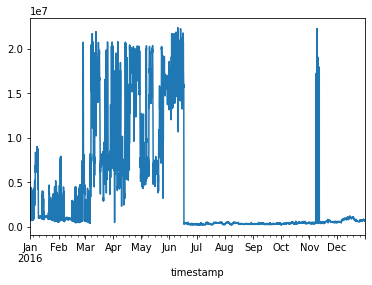

In [51]:
# Daily
df_steam['meter_reading'].plot()

<AxesSubplot:xlabel='timestamp'>

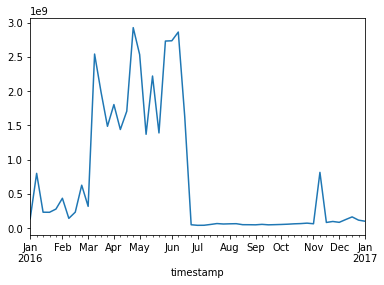

In [53]:
# Weekly
df_steam['meter_reading'].resample('W').sum().plot()

<AxesSubplot:xlabel='timestamp'>

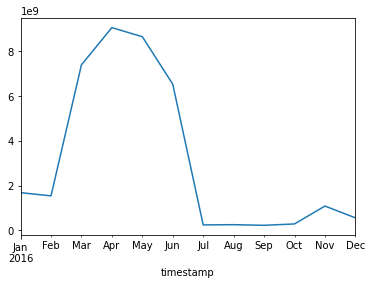

In [54]:
# Monthly
df_steam['meter_reading'].resample('M').sum().plot()

In [56]:
df_steam_building = (
    train_df
    .query('meter == 2')
    .groupby(['timestamp', 'building_id'])['meter_reading']
    .sum()
    .reset_index()
    .set_index('timestamp')
)

df_steam_building.head()

,building_id,meter_reading
timestamp,,
2016-01-01,745,0.000
2016-01-01,747,120.786
2016-01-01,750,4678.140
2016-01-01,751,0.000
2016-01-01,753,324.226


In [57]:
df_steam_building['building_id'].unique().shape

(324,)

# Hotwater

In [58]:
df_hotwater = df_meter.query('meter == 3')
df_hotwater.head()

,meter,meter_reading
timestamp,,
2016-01-01 00:00:00,3,87655.1681
2016-01-01 01:00:00,3,60670.8718
2016-01-01 02:00:00,3,68204.1314
2016-01-01 03:00:00,3,61265.7329
2016-01-01 04:00:00,3,64722.2291


<AxesSubplot:>

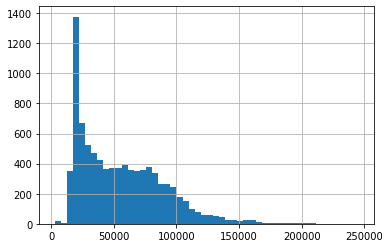

In [59]:
df_hotwater['meter_reading'].hist(bins=50)

In [60]:
df_hotwater['meter_reading'].describe()

count      8784.000000
mean      55527.081991
std       33799.846600
min        2923.173900
25%       25143.100375
50%       49141.478300
75%       77997.790850
max      245873.194700
Name: meter_reading, dtype: float64

<AxesSubplot:xlabel='timestamp'>

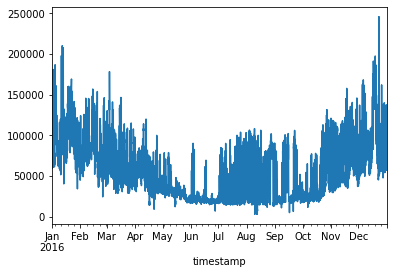

In [61]:
# Daily
df_hotwater['meter_reading'].plot()

<AxesSubplot:xlabel='timestamp'>

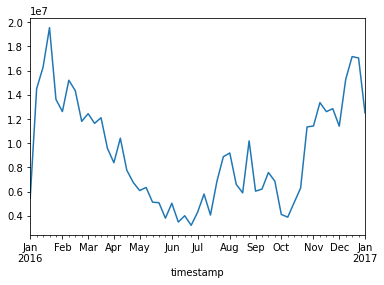

In [62]:
# Weekly
df_hotwater['meter_reading'].resample('W').sum().plot()

<AxesSubplot:xlabel='timestamp'>

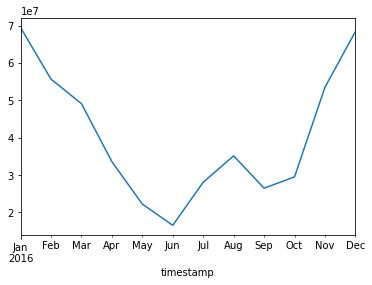

In [63]:
# Monthly
df_hotwater['meter_reading'].resample('M').sum().plot()

In [64]:
df_hotwater_building = (
    train_df
    .query('meter == 3')
    .groupby(['timestamp', 'building_id'])['meter_reading']
    .sum()
    .reset_index()
    .set_index('timestamp')
)

df_hotwater_building.head()

,building_id,meter_reading
timestamp,,
2016-01-01,106,0.000
2016-01-01,109,0.000
2016-01-01,112,96.978
2016-01-01,113,19.597
2016-01-01,114,100.000


In [65]:
df_hotwater_building['building_id'].unique().shape

(145,)